# Sentiment Analysis

## Task 3

In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
 
df_emergencyplus_google = pd.read_csv('./data/emergency-plus google.csv')
df_emergencyplus_google.head()
df_firstaid_google = pd.read_csv('./data/Red-cross-google.csv')
df_emergencyplus_apple = pd.read_csv('./data/emergency-plus-apple.csv')
df_firstaid_apple = pd.read_csv('./data/redcross-apple.csv')
    
def sentimentAnalysis(app_review_df):
    reviews = app_review_df['Review'].values.tolist();
    analyzer = SentimentIntensityAnalyzer()
    sentiments = []

    for sentence in reviews:
        vs = analyzer.polarity_scores(sentence)

        if(vs["compound"] >= 0.05):
            sentiments.append(1) 
        elif(vs["compound"] > -0.05):
            sentiments.append(0)
        elif(vs["compound"] <= -0.05):
            sentiments.append(-1) 

    app_review_df["sentiment"] = sentiments
    
    return app_review_df


df_emergencyplus_google_s = sentimentAnalysis(df_emergencyplus_google)
df_emergencyplus_apple_s = sentimentAnalysis(df_emergencyplus_apple)

df_firstaid_google_s = sentimentAnalysis(df_firstaid_google)
df_firstaid_apple_s = sentimentAnalysis(df_firstaid_apple)

df_emergencyplus_combined_s = pd.concat([df_emergencyplus_google, df_emergencyplus_apple])
df_firstaid_combined_s = pd.concat([df_firstaid_google, df_firstaid_apple])


df_emergencyplus_google_s.to_csv('./data/emergencyplus_google_sentiment.csv', encoding='utf-8')
df_emergencyplus_apple_s.to_csv('./data/emergencyplus_apple_sentiment.csv', encoding='utf-8')
df_firstaid_google_s.to_csv('./data/firstaid_google_sentiment.csv', encoding='utf-8')
df_firstaid_apple_s.to_csv('./data/firstaid_apple_sentiment.csv', encoding='utf-8')

df_emergencyplus_combined_s.to_csv('./data/emergencyplus_combined_sentiment.csv', encoding='utf-8')
df_firstaid_combined_s.to_csv('./data/firstaid_combined_sentiment.csv', encoding='utf-8')

## Task 4 - plotting rating  and sentiment over time

C:\Users\Kalpani Ranasinghe\AppData\Local\Temp\ipykernel_24680\3330184130.py:30: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_new = df[dates[i]:]
C:\Users\Kalpani Ranasinghe\AppData\Local\Temp\ipykernel_24680\3330184130.py:33: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_new = df[dates[i]:dates[i-1]]
C:\Users\Kalpani Ranasinghe\AppData\Local\Temp\ipykernel_24680\3330184130.py:33: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_new = df[dates[i]:dates[i-1]]
C:\Users\Kalpani Ranasinghe\AppData\Local\Temp\ipykernel_24680\3330184130.py:30: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is

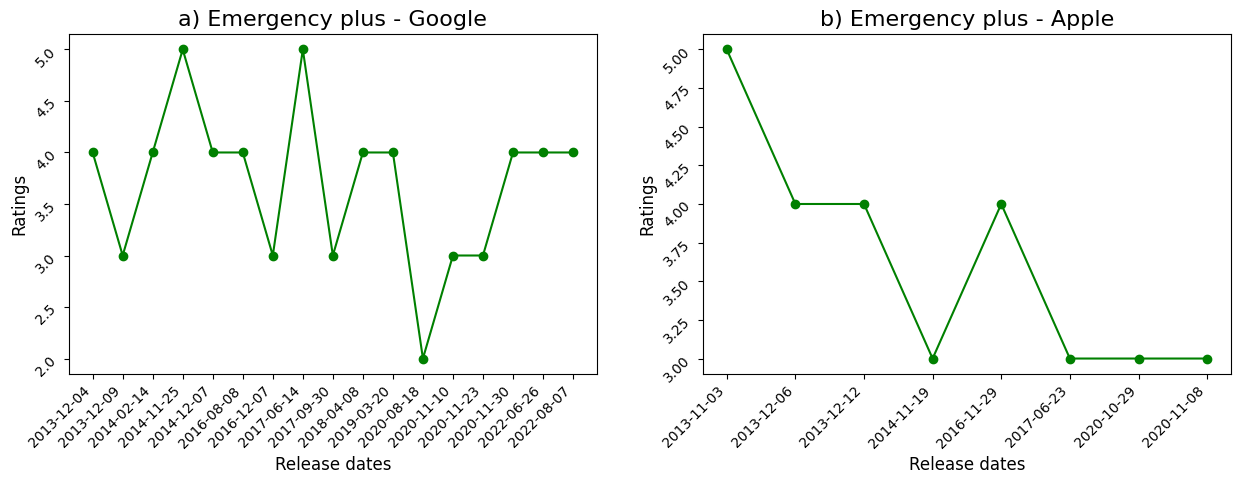

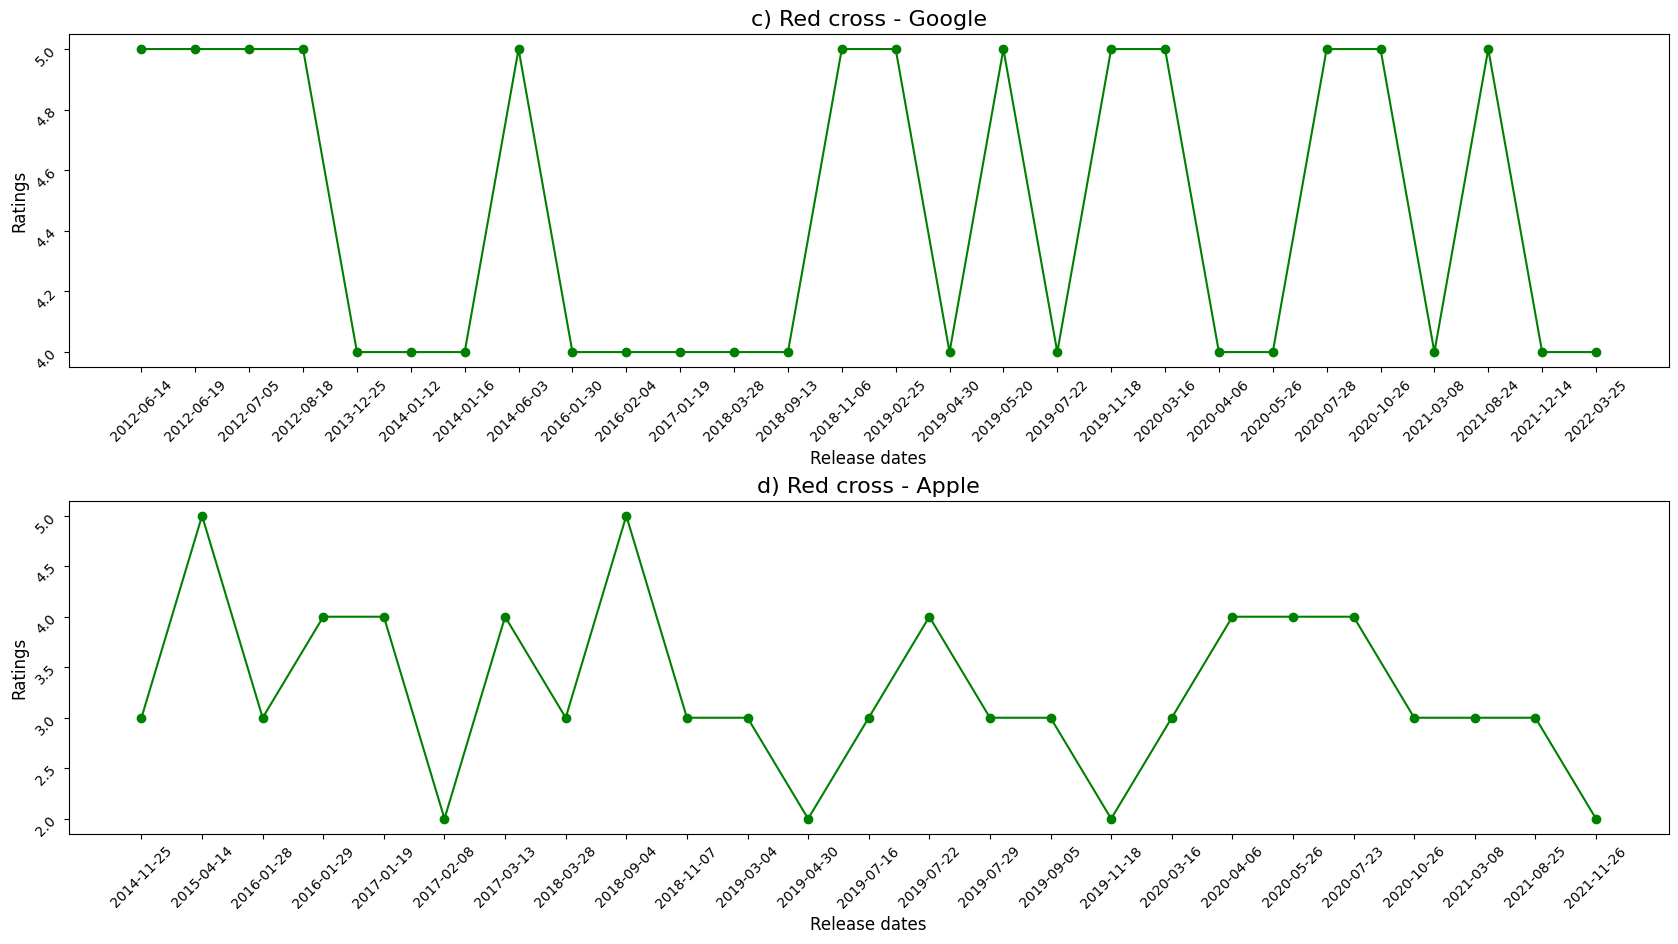

In [2]:
#writing functions - testing II - more improved

import matplotlib.pyplot as plt
from datetime import datetime

df_emergencyplus_google_versions = pd.read_csv('./data/emergencyplus_version_details_google.csv') 
df_firstaid_google_vesions = pd.read_csv('./data/firstaid_version_details_google.csv')
df_emergencyplus_apple_versions = pd.read_csv('./data/emergencyplus_version_details_apple.csv') 
df_firstaid_apple_vesions = pd.read_csv('./data/firstaid_version_details_apple.csv')

# dates= df_emergencyplus_google_versions['ReleaseDate'] ##jsut the string of dates??
# print(dates)

def indexingDateCol(df):
    df['Date of Review']=pd.to_datetime(df['Date of Review'])
    df = df.set_index(df['Date of Review'])
    df = df.sort_index(ascending=False)
    
    return df



def averageRatingPerReleasedate(df,version_df):
    average_rating_list = []
    dates= version_df['ReleaseDate']
    df = indexingDateCol(df)
    df_new = pd.DataFrame()
    for i in range(0, len(dates)):
        if(i==0):
            df_new = df[dates[i]:]
            
        else:
            df_new = df[dates[i]:dates[i-1]]
            
            
        average_rating_list.append(getAverageRating(df_new))

    return average_rating_list

def getAverageRating(df):
    mean = 0
    if(df.empty): #when particular range contains no values
        mean = 3 #assumption that average rating will be neural
    else:
        mean = round(df['Rating'].mean())
    return mean


fig, ax = plt.subplots(1,2, figsize=(15,5))

def plotRating1(df,rating_list, ax,col, ylabelName, color):  
    dates = df['ReleaseDate']
    dates = dates[::-1]#reversing
    
    #fig, ax = plt.subplots()
    ax[col].plot(dates, rating_list[::-1], **{'color': color, 'marker': 'o'})
    #plt.xticks(rotation = 45)
    ax[col].tick_params(labelrotation=45)
    ax[col].set_xlabel('Release dates', fontsize = 12) #for presentation purposes fontsize has increased
    ax[col].set_ylabel(ylabelName, fontsize = 12)
    #fig.autofmt_xdate()
    fig.autofmt_xdate(rotation=45)
    
    
def plotRating2(df,rating_list, ax, ylabelName):  
    dates = df['ReleaseDate']
    dates = dates[::-1]
    
    #fig, ax = plt.subplots()
    ax.plot(dates, rating_list[::-1])
    ax.set_xlabel('Release dates')
    ax.set_ylabel(ylabelName)
    fig.autofmt_xdate()

rating_list1 = averageRatingPerReleasedate(df_emergencyplus_google_s, df_emergencyplus_google_versions)
ax[0].set_title('a) Emergency plus - Google',fontsize = 16)
plotRating1(df_emergencyplus_google_versions, rating_list1,ax, 0, "Ratings", 'green')

# df_emergencyplus_google_versions['rating'] = rating_list1
# print(df_emergencyplus_google_versions)


rating_list2 = averageRatingPerReleasedate(df_emergencyplus_apple_s, df_emergencyplus_apple_versions)
ax[1].set_title('b) Emergency plus - Apple',fontsize = 16)
plotRating1(df_emergencyplus_apple_versions,rating_list2,ax, 1 , "Ratings", 'green')

fig1, ax1 = plt.subplots(2, figsize=(20,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

rating_list3 = averageRatingPerReleasedate(df_firstaid_google_s, df_firstaid_google_vesions)
ax1[0].set_title('c) Red cross - Google',fontsize = 16)
plotRating1(df_firstaid_google_vesions,rating_list3, ax1,0, "Ratings", 'green')


rating_list4 = averageRatingPerReleasedate(df_firstaid_apple_s, df_firstaid_apple_vesions)
ax1[1].set_title('d) Red cross - Apple',fontsize = 16)
plotRating1(df_firstaid_apple_vesions, rating_list4, ax1,1, "Ratings", 'green')


## Task 4.2 - plotting sentiment over time

[-1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
   ReleaseVersion Release_period_startDate Release_period_endDate  sentiment
0          2.12.0               2021-11-26                      -         -1
1          2.11.2               2021-08-25             2021-11-26          0
2          2.11.1               2021-03-08             2021-08-25          0
3          2.11.0               2020-10-26             2021-03-08          0
4          2.10.0               2020-07-23             2020-10-26          1
5           2.9.0               2020-05-26             2020-07-23         -1
6           2.8.2               2020-04-06             2020-05-26         -1
7           2.8.1               2020-03-16             2020-04-06          0
8           2.8.0               2019-11-18             2020-03-16         -1
9           2.7.3               2019-09-05             2019-11-18          0
10          2.7.2               2019-07-29             2019-09-05         -1
11          2.7.1     

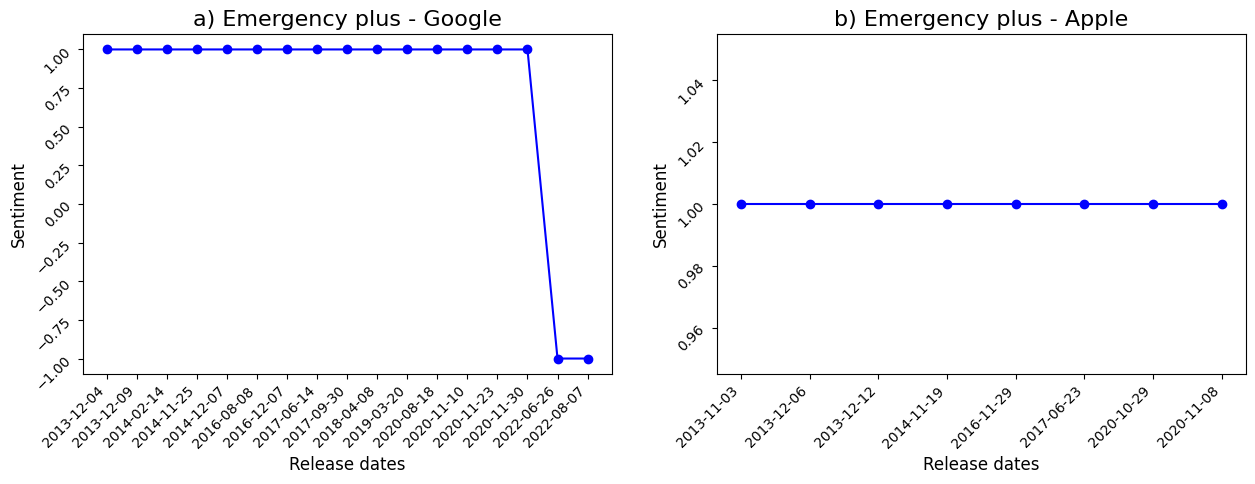

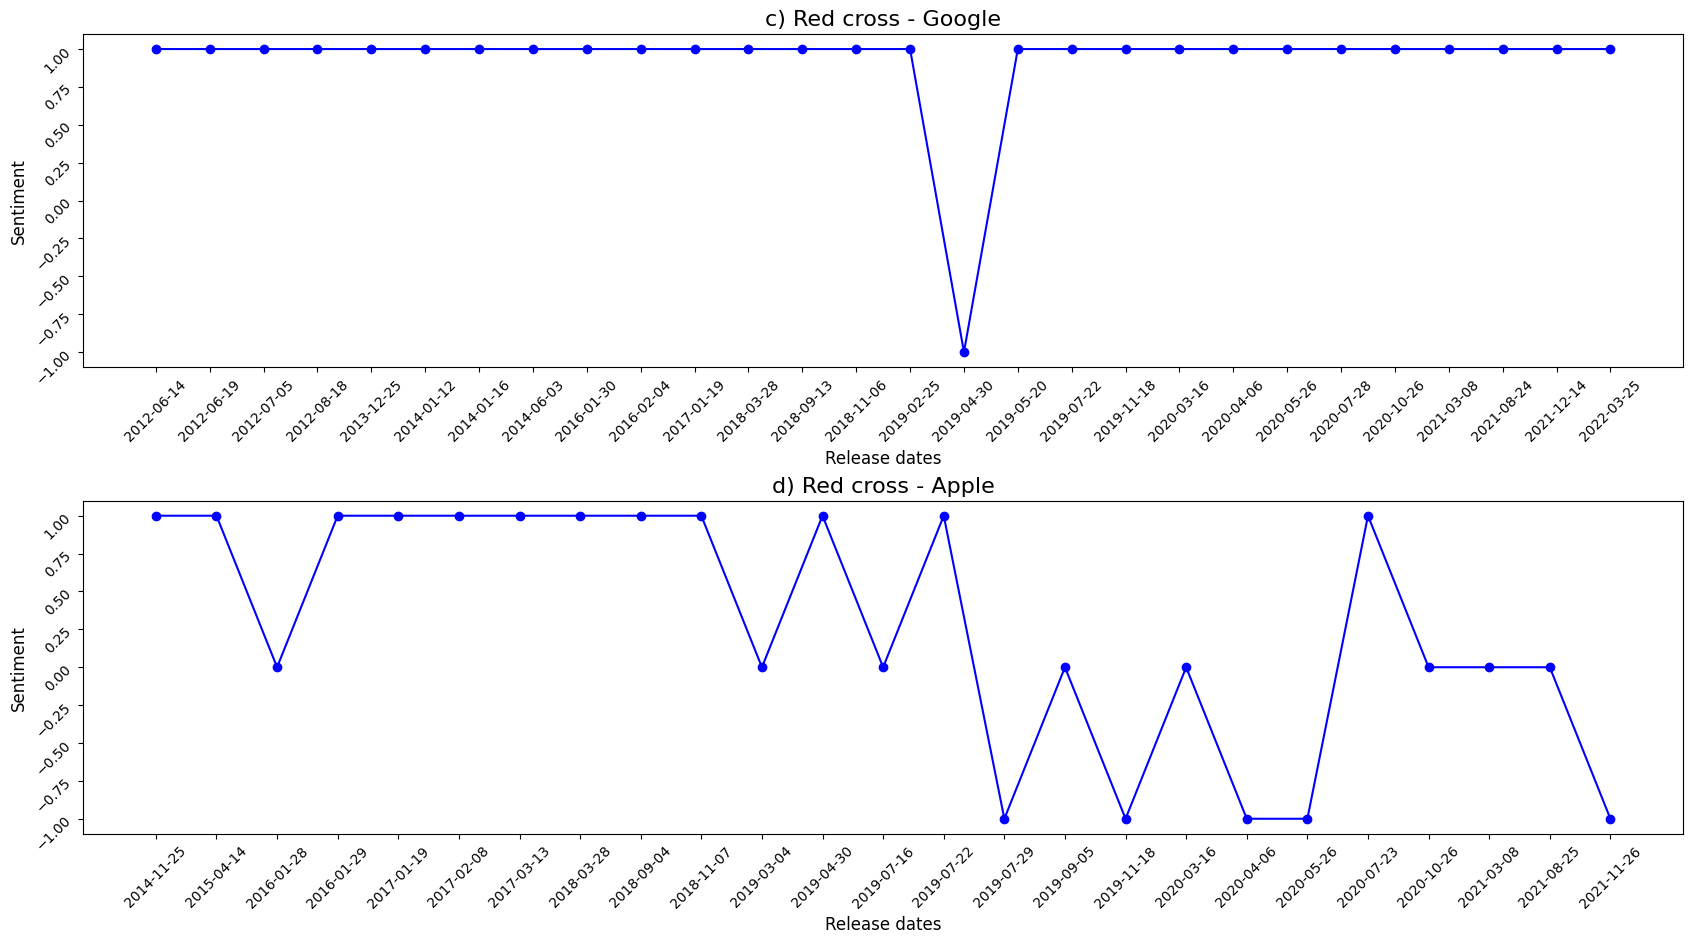

In [3]:
import datetime
import time

import warnings
warnings.filterwarnings('ignore')

def sentimentPerReleasedate(df,version_df):
    sentiment_list = []
    dates= version_df['ReleaseDate']
    df = indexingDateCol(df)
    df_new = pd.DataFrame()
    for i in range(0, len(dates)):
        if(i==0):
            df_new = df[dates[i]:]
        else:
            df_new = df[dates[i]:dates[i-1]]
        
        sentiment_list.append(getFrequentSentiment(df_new))

    return sentiment_list

def getFrequentSentiment(df):
    sentiment = 0
    if(df.empty): #when particular range contains no values
        sentiment = 0 #assumption that average rating will be neural
    else:
        sentiment = df['sentiment'].mode()[0]

    return sentiment

fig, ax = plt.subplots(1,2, figsize=(15,5))
sentiment_list1 = sentimentPerReleasedate(df_emergencyplus_google_s, df_emergencyplus_google_versions)
print(sentiment_list1)
ax[0].set_title('a) Emergency plus - Google', fontsize = 16)
plotRating1(df_emergencyplus_google_versions, sentiment_list1,ax, 0, "Sentiment", 'blue')

sentiment_list2 = sentimentPerReleasedate(df_emergencyplus_apple_s, df_emergencyplus_apple_versions)
ax[1].set_title('b) Emergency plus - Apple',fontsize = 16)
plotRating1(df_emergencyplus_apple_versions,sentiment_list2,ax, 1, "Sentiment", 'blue')

fig1, ax1 = plt.subplots(2, figsize=(20,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

sentiment_list3 = sentimentPerReleasedate(df_firstaid_google_s, df_firstaid_google_vesions)
ax1[0].set_title('c) Red cross - Google',fontsize = 16)
plotRating1(df_firstaid_google_vesions,sentiment_list3, ax1,0, "Sentiment", 'blue')

sentiment_list4 = sentimentPerReleasedate(df_firstaid_apple_s, df_firstaid_apple_vesions)
ax1[1].set_title('d) Red cross - Apple',fontsize = 16)
plotRating1(df_firstaid_apple_vesions, sentiment_list4, ax1,1, "Sentiment", 'blue')

#table used in the report to describe the release periods (Table I)
ends = []
for i in range(df_firstaid_apple_vesions['ReleaseDate'].size):
    if(i==0):
        ends.append('-')
    else:
        ends.append(df_firstaid_apple_vesions['ReleaseDate'][i-1])
        
#print(ends)
df_firstaid_apple_vesions['sentiment'] = sentiment_list4
df_firstaid_apple_vesions['Release_period_endDate'] = ends
new = df_firstaid_apple_vesions.filter(['ReleaseVersion', 'ReleaseDate' , 'Release_period_endDate', 'sentiment'], axis=1)
new.rename(columns = {'ReleaseDate':'Release_period_startDate'}, inplace = True)
print(new)


